In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in dataset, rename columns, sort by Name, and reset index.

In [2]:
ref_names = pd.read_csv("Ref Names.csv")
ref_names = ref_names.dropna()
ref_names = ref_names.rename(columns = {'Unnamed: 0': 'Name', 'Unnamed: 1': 'First Game (Date)', 'Unnamed: 2': 'Most Recent Game (Date)'})
ref_names = ref_names.sort_values(by='Name')
ref_names = ref_names.reset_index(drop=True)
ref_names

,Name,First Game (Date),Most Recent Game (Date)
0,Aaron Smith,10-Nov-15,6-Mar-23
1,Ben Taylor,6-Feb-12,11-Mar-23
2,Bill Kennedy,3-Nov-95,11-Mar-23
3,Brent Barnaky,4-Dec-09,11-Mar-23
4,Brett Nansel,3-Nov-14,11-Mar-23
5,Brian Forte,2-Nov-07,12-Mar-23
6,C.J. Washington,14-Nov-14,11-Mar-23
7,Courtney Kirkland,9-Nov-99,12-Mar-23
8,Curtis Blair,29-Oct-08,11-Mar-23
9,David Guthrie,2-Nov-05,11-Mar-23


Read in individual referee data frames and assign to variables.

In [3]:
aaronsmith = pd.read_csv("aaronsmith.csv")
bentaylor = pd.read_csv("bentaylor.csv")
billkennedy = pd.read_csv("billkennedy.csv")
brentbarnaky = pd.read_csv("brentbarnaky.csv")
brettnansel = pd.read_csv("brettnansel.csv")
brianforte = pd.read_csv("brianforte.csv")
cjwashington = pd.read_csv("cjwashington.csv")
courtneykirkland = pd.read_csv("courtneykirkland.csv")
curtisblair = pd.read_csv("curtisblair.csv")
davidguthrie = pd.read_csv("davidguthrie.csv")
dedrictaylor = pd.read_csv("dedrictaylor.csv")
derekrichardson = pd.read_csv("derekrichardson.csv")
derrickcollins = pd.read_csv("derrickcollins.csv")
edmalloy = pd.read_csv("edmalloy.csv")
ericdalen = pd.read_csv("ericdalen.csv")
ericlewis = pd.read_csv("ericlewis.csv")
gediminaspetraitis = pd.read_csv("gediminaspetraitis.csv")
jtorr = pd.read_csv("jtorr.csv")
jamescapers = pd.read_csv("jamescapers.csv")
jameswilliams = pd.read_csv("jameswilliams.csv")
johngoble = pd.read_csv("johngoble.csv")
joshtiven = pd.read_csv("joshtiven.csv")
justinvanduyne = pd.read_csv("justinvanduyne.csv")
karllane = pd.read_csv("karllane.csv")
kevincutler = pd.read_csv("kevincutler.csv")
kevinscott = pd.read_csv("kevinscott.csv")
leonwood = pd.read_csv("leonwood.csv")
maratkogut = pd.read_csv("maratkogut.csv")
marcdavis = pd.read_csv("marcdavis.csv")
marklindsay = pd.read_csv("marklindsay.csv")
mattboland = pd.read_csv("mattboland.csv")
mattmyers = pd.read_csv("mattmyers.csv")
michaelsmith = pd.read_csv("michaelsmith.csv")
mitchellervin = pd.read_csv("mitchellervin.csv")
nickbuchert = pd.read_csv("nickbuchert.csv")
patfraher = pd.read_csv("patfraher.csv")
rodneymott = pd.read_csv("rodneymott.csv")
scottfoster = pd.read_csv("scottfoster.csv")
scotttwardoski = pd.read_csv("scotttwardoski.csv")
scottwall = pd.read_csv("scottwall.csv")
seancorbin = pd.read_csv("seancorbin.csv")
seanwright = pd.read_csv("seanwright.csv")
tomwashington = pd.read_csv("tomwashington.csv")
tonybrothers = pd.read_csv("tonybrothers.csv")
tremaddox = pd.read_csv("tremaddox.csv")
tylerford = pd.read_csv("tylerford.csv")
zachzarba = pd.read_csv("zachzarba.csv")

Loop over all data sets and change variable names in one step. Assign clean data frames to new variables.

In [4]:
referee_dict = {
    'aaronsmith': pd.read_csv("aaronsmith.csv"),
    'bentaylor': pd.read_csv("bentaylor.csv"),
    'billkennedy': pd.read_csv("billkennedy.csv"),
    'brentbarnaky': pd.read_csv("brentbarnaky.csv"),
    'brettnansel': pd.read_csv("brettnansel.csv"),
    'brianforte': pd.read_csv("brianforte.csv"),
    'cjwashington': pd.read_csv("cjwashington.csv"),
    'courtneykirkland': pd.read_csv("courtneykirkland.csv"),
    'curtisblair': pd.read_csv("curtisblair.csv"),
    'davidguthrie': pd.read_csv("davidguthrie.csv"),
    'dedrictaylor': pd.read_csv("dedrictaylor.csv"),
    'derekrichardson': pd.read_csv("derekrichardson.csv"),
    'derrickcollins': pd.read_csv("derrickcollins.csv"),
    'edmalloy': pd.read_csv("edmalloy.csv"),
    'ericdalen': pd.read_csv("ericdalen.csv"),
    'ericlewis': pd.read_csv("ericlewis.csv"),
    'gediminaspetraitis': pd.read_csv("gediminaspetraitis.csv"),
    'jtorr': pd.read_csv("jtorr.csv"),
    'jamescapers': pd.read_csv("jamescapers.csv"),
    'jameswilliams': pd.read_csv("jameswilliams.csv"),
    'johngoble': pd.read_csv("johngoble.csv"),
    'joshtiven': pd.read_csv("joshtiven.csv"),
    'justinvanduyne': pd.read_csv("justinvanduyne.csv"),
    'karllane': pd.read_csv("karllane.csv"),
    'kevincutler': pd.read_csv("kevincutler.csv"),
    'kevinscott': pd.read_csv("kevinscott.csv"),
    'leonwood': pd.read_csv("leonwood.csv"),
    'maratkogut': pd.read_csv("maratkogut.csv"),
    'marcdavis': pd.read_csv("marcdavis.csv"),
    'marklindsay': pd.read_csv("marklindsay.csv"),
    'mattboland': pd.read_csv("mattboland.csv"),
    'mattmyers': pd.read_csv("mattmyers.csv"),
    'michaelsmith': pd.read_csv("michaelsmith.csv"),
    'mitchellervin': pd.read_csv("mitchellervin.csv"),
    'nickbuchert': pd.read_csv("nickbuchert.csv"),
    'patfraher': pd.read_csv("patfraher.csv"),
    'rodneymott': pd.read_csv("rodneymott.csv"),
    'scottfoster': pd.read_csv("scottfoster.csv"),
    'scotttwardoski': pd.read_csv("scotttwardoski.csv"),
    'scottwall': pd.read_csv("scottwall.csv"),
    'seancorbin': pd.read_csv("seancorbin.csv"),
    'seanwright': pd.read_csv("seanwright.csv"),
    'tomwashington': pd.read_csv("tomwashington.csv"),
    'tonybrothers': pd.read_csv("tonybrothers.csv"),
    'tremaddox': pd.read_csv("tremaddox.csv"),
    'tylerford': pd.read_csv("tylerford.csv"),
    'zachzarba': pd.read_csv("zachzarba.csv"),
}

for name, df in referee_dict.items():
    # Rename columns, drop columns, etc.
    # For example:
    df = df.rename(columns={
        'Unnamed: 1': 'Team',
        'Summary': 'Total Games Officiated',
        'Unnamed: 4': 'Wins',
        'Unnamed: 5': 'Losses',
        'Unnamed: 6': 'Win/Loss %',
        'Unnamed: 7': 'Pace',
        'Team per 48': 'Team Points Per Game',
        'Unnamed: 10': 'Free Throws Attempted',
        'Unnamed: 11': 'Personal Fouls',
        'Unnamed: 12': 'Shooting Fouls',
        'Unnamed: 13': 'Offensive Fouls',
        'Opponent per 48': 'Opponent Points Per Game',
        'Unnamed: 16': 'Opponent Free Throws Attempted',
        'Unnamed: 17': 'Opponent Personal Fouls',
        'Unnamed: 18': 'Opponent Shooting Fouls',
        'Unnamed: 19': 'Opponent Offensive Fouls',
        'Diff per 48': 'Point Differential',
        'Unnamed: 22': 'Free Throw Differential',
        'Unnamed: 23': 'Personal Foul Differential',
        'Unnamed: 24': 'Shooting Foul Differential',
        'Unnamed: 25': 'Offensive Foul Differential'
    })
    df = df.drop(0)
    df = df.dropna(axis='columns')
    df = df.iloc[:, 1:]
    # Save the cleaned data frame back to the dictionary
    referee_dict[name] = df
    
aaronsmith_clean = referee_dict["aaronsmith"]
bentaylor_clean = referee_dict["bentaylor"]
billkennedy_clean = referee_dict["billkennedy"]
brentbarnaky_clean = referee_dict["brentbarnaky"]
brettnansel_clean = referee_dict["brettnansel"]
brianforte_clean = referee_dict["brianforte"]
cjwashington_clean = referee_dict["cjwashington"]
courtneykirkland_clean = referee_dict["courtneykirkland"]
curtisblair_clean = referee_dict["curtisblair"]
davidguthrie_clean = referee_dict["davidguthrie"]
dedrictaylor_clean = referee_dict["dedrictaylor"]
derekrichardson_clean = referee_dict["derekrichardson"]
derrickcollins_clean = referee_dict["derrickcollins"]
edmalloy_clean = referee_dict["edmalloy"]
ericdalen_clean = referee_dict["ericdalen"]
ericlewis_clean = referee_dict["ericlewis"]
gediminaspetraitis_clean = referee_dict["gediminaspetraitis"]
jtorr_clean = referee_dict["jtorr"]
jamescapers_clean = referee_dict["jamescapers"]
jameswilliams_clean = referee_dict["jameswilliams"]
johngoble_clean = referee_dict["johngoble"]
joshtiven_clean = referee_dict["joshtiven"]
justinvanduyne_clean = referee_dict["justinvanduyne"]
karllane_clean = referee_dict["karllane"]
kevincutler_clean = referee_dict["kevincutler"]
kevinscott_clean = referee_dict["kevinscott"]
leonwood_clean = referee_dict["leonwood"]
maratkogut_clean = referee_dict["maratkogut"]
marcdavis_clean = referee_dict["marcdavis"]
marklindsay_clean = referee_dict["marklindsay"]
mattboland_clean = referee_dict["mattboland"]
mattmyers_clean = referee_dict["mattmyers"]
michaelsmith_clean = referee_dict["michaelsmith"]
mitchellervin_clean = referee_dict["mitchellervin"]
nickbuchert_clean = referee_dict["nickbuchert"]
patfraher_clean = referee_dict["patfraher"]
rodneymott_clean = referee_dict["rodneymott"]
scottfoster_clean = referee_dict["scottfoster"]
scotttwardoski_clean = referee_dict["scotttwardoski"]
scottwall_clean = referee_dict["scottwall"]
seancorbin_clean = referee_dict["seancorbin"]
seanwright_clean = referee_dict["seanwright"]
tomwashington_clean = referee_dict["tomwashington"]
tonybrothers_clean = referee_dict["tonybrothers"]
tremaddox_clean = referee_dict["tremaddox"]
tylerford_clean = referee_dict["tylerford"]
zachzarba_clean = referee_dict["zachzarba"]

In [5]:
# create a list of the 47 clean data frames
referee_list = [aaronsmith_clean, bentaylor_clean, billkennedy_clean, brentbarnaky_clean, brettnansel_clean, brianforte_clean, cjwashington_clean, courtneykirkland_clean, curtisblair_clean, davidguthrie_clean, dedrictaylor_clean, derekrichardson_clean, derrickcollins_clean, edmalloy_clean, ericdalen_clean, ericlewis_clean, gediminaspetraitis_clean, jtorr_clean, jamescapers_clean, jameswilliams_clean, johngoble_clean, joshtiven_clean, justinvanduyne_clean, karllane_clean, kevincutler_clean, kevinscott_clean, leonwood_clean, maratkogut_clean, marcdavis_clean, marklindsay_clean, mattboland_clean, mattmyers_clean, michaelsmith_clean, mitchellervin_clean, nickbuchert_clean, patfraher_clean, rodneymott_clean, scottfoster_clean, scotttwardoski_clean, scottwall_clean, seancorbin_clean, seanwright_clean, tomwashington_clean, tonybrothers_clean, tremaddox_clean, tylerford_clean, zachzarba_clean]

# create a list of referee names in the correct order
referee_names = ['Aaron Smith', 'Ben Taylor', 'Bill Kennedy', 'Brent Barnaky', 'Brett Nansel', 'Brian Forte', 'C.J. Washington', 'Courtney Kirkland', 'Curtis Blair', 'David Guthrie', 'Dedric Taylor', 'Derek Richardson', 'Derrick Collins', 'Ed Malloy', 'Eric Dalen', 'Eric Lewis', 'Gediminas Petraitis', 'J.T. Orr', 'James Capers Jr.', 'James Williams', 'John Goble', 'Josh Tiven', 'Justin Van Duyne', 'Karl Lane', 'Kevin Cutler', 'Kevin Scott', 'Leon Wood', 'Marat Kogut', 'Marc Davis', 'Mark Lindsay', 'Matt Boland', 'Matt Myers', 'Michael Smith', 'Mitchell Ervin', 'Nick Buchert', 'Pat Fraher', 'Rodney Mott', 'Scott Foster', 'Scott Twardoski', 'Scott Wall', 'Sean Corbin', 'Sean Wright', 'Tom Washington', 'Tony Brothers', 'Tre Maddox', 'Tyler Ford', 'Zach Zarba']

# concatenate all data frames into one and reset the index
combined_df = pd.concat(referee_list)
combined_df = combined_df.reset_index(drop=True)

# loop through each group of 30 rows and assign the respective referee's name
for i, name in enumerate(referee_names):
    combined_df.loc[i*30:i*30+29, 'Referee Name'] = referee_names[i]

# function to format referee's name
def format_name(name):
    return name

# apply the format_name function to each row in the data frame to format the referee's name
combined_df["Referee Name"] = combined_df["Referee Name"].apply(format_name)

# move the Referee Name column to the first position and drop unneccesary columns
cols = combined_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Referee Name')))
combined_df = combined_df.reindex(columns=cols)
combined_df = combined_df.drop(columns=['Pace'])

In [6]:
combined_df

,Referee Name,Team,Total Games Officiated,Wins,Losses,Win/Loss %,Team Points Per Game,Free Throws Attempted,Personal Fouls,Shooting Fouls,...,Opponent Points Per Game,Opponent Free Throws Attempted,Opponent Personal Fouls,Opponent Shooting Fouls,Opponent Offensive Fouls,Point Differential,Free Throw Differential,Personal Foul Differential,Shooting Foul Differential,Offensive Foul Differential
0,Aaron Smith,Milwaukee Bucks,30,18,12,0.6,110.5,22.5,17.5,6.9,...,106.8,17.6,19.9,10.1,1.4,3.7,4.9,-2.4,-3.2,0.3
1,Aaron Smith,Boston Celtics,32,25,7,0.781,112.6,21,19.3,9.4,...,103.2,22.3,18.5,8.6,1.7,9.4,-1.3,0.8,0.8,-0.5
2,Aaron Smith,Cleveland Cavaliers,20,14,6,0.7,111.9,20.2,18,9.5,...,105.4,20.8,17.8,8.8,1.5,6.5,-0.6,0.2,0.7,-0.4
3,Aaron Smith,Detroit Pistons,34,14,20,0.412,101.4,21,17.6,8.5,...,106.6,19,18,9,1.3,-5.2,2,-0.4,-0.5,0.2
4,Aaron Smith,Charlotte Hornets,23,12,11,0.522,108.4,24.1,17.1,8,...,110.2,18.2,19.6,10.6,1.3,-1.8,5.9,-2.5,-2.6,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Zach Zarba,Utah Jazz,81,46,35,0.568,101.5,23.9,21.6,9.7,...,99.9,24.4,21.3,9.7,2.1,1.6,-0.5,0.3,0,-0.3
1406,Zach Zarba,Cleveland Cavaliers,80,41,39,0.513,101.5,24.3,20.1,9.3,...,103.3,22.7,20.6,10.1,1.6,-1.8,1.6,-0.5,-0.8,0.1
1407,Zach Zarba,Los Angeles Lakers,88,51,37,0.58,103.2,24.1,19.4,8.7,...,102.3,21,20.9,10.4,1.6,0.9,3.1,-1.5,-1.7,0.1
1408,Zach Zarba,Memphis Grizzlies,71,36,35,0.507,99.8,25,21.7,9.8,...,101,24.3,22,10.2,2,-1.2,0.7,-0.3,-0.4,0


In [7]:
# Convert relevant columns to numerical format
diff_cols = ['Win/Loss %', 'Point Differential', 'Free Throw Differential', 'Personal Foul Differential', 'Shooting Foul Differential', 'Offensive Foul Differential']
combined_df[diff_cols] = combined_df[diff_cols].apply(pd.to_numeric)

# Define the bias calculation function
def calculate_bias(row):
    # Extract the differential values from the row
    win_loss = row['Win/Loss %']
    point_diff = row['Point Differential']
    ft_diff = row['Free Throw Differential']
    pf_diff = row['Personal Foul Differential']
    sf_diff = row['Shooting Foul Differential']
    of_diff = row['Offensive Foul Differential']
    
    # Calculate the bias score using custom formula
    bias_score = (0.2 * win_loss) + (0.2 * point_diff) + (0.15 * ft_diff) + \
                 (0.15 * pf_diff) + (0.15 * sf_diff) + (0.15 * of_diff)
    
    return bias_score

# Calculate the bias score for each row in the combined_df dataframe
bias_scores = combined_df.apply(calculate_bias, axis=1)

# Define the golden zone for the bias score (can be adjusted as needed)
golden_zone_low = -0.7
golden_zone_high = 0.7

# Add the bias score column to the combined_df dataframe
combined_df['Bias Score'] = bias_scores

# Set bias threshold
bias_threshold = 0.5

# Create bias column
combined_df['Bias'] = combined_df['Bias Score'].apply(lambda x: "No Bias" if -bias_threshold <= x <= bias_threshold else "Bias")

In [8]:
combined_df

,Referee Name,Team,Total Games Officiated,Wins,Losses,Win/Loss %,Team Points Per Game,Free Throws Attempted,Personal Fouls,Shooting Fouls,...,Opponent Personal Fouls,Opponent Shooting Fouls,Opponent Offensive Fouls,Point Differential,Free Throw Differential,Personal Foul Differential,Shooting Foul Differential,Offensive Foul Differential,Bias Score,Bias
0,Aaron Smith,Milwaukee Bucks,30,18,12,0.600,110.5,22.5,17.5,6.9,...,19.9,10.1,1.4,3.7,4.9,-2.4,-3.2,0.3,0.8000,Bias
1,Aaron Smith,Boston Celtics,32,25,7,0.781,112.6,21,19.3,9.4,...,18.5,8.6,1.7,9.4,-1.3,0.8,0.8,-0.5,2.0062,Bias
2,Aaron Smith,Cleveland Cavaliers,20,14,6,0.700,111.9,20.2,18,9.5,...,17.8,8.8,1.5,6.5,-0.6,0.2,0.7,-0.4,1.4250,Bias
3,Aaron Smith,Detroit Pistons,34,14,20,0.412,101.4,21,17.6,8.5,...,18,9,1.3,-5.2,2.0,-0.4,-0.5,0.2,-0.7626,Bias
4,Aaron Smith,Charlotte Hornets,23,12,11,0.522,108.4,24.1,17.1,8,...,19.6,10.6,1.3,-1.8,5.9,-2.5,-2.6,0.3,-0.0906,No Bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Zach Zarba,Utah Jazz,81,46,35,0.568,101.5,23.9,21.6,9.7,...,21.3,9.7,2.1,1.6,-0.5,0.3,0.0,-0.3,0.3586,No Bias
1406,Zach Zarba,Cleveland Cavaliers,80,41,39,0.513,101.5,24.3,20.1,9.3,...,20.6,10.1,1.6,-1.8,1.6,-0.5,-0.8,0.1,-0.1974,No Bias
1407,Zach Zarba,Los Angeles Lakers,88,51,37,0.580,103.2,24.1,19.4,8.7,...,20.9,10.4,1.6,0.9,3.1,-1.5,-1.7,0.1,0.2960,No Bias
1408,Zach Zarba,Memphis Grizzlies,71,36,35,0.507,99.8,25,21.7,9.8,...,22,10.2,2,-1.2,0.7,-0.3,-0.4,0.0,-0.1386,No Bias


Visualize the spread of our deciding statistics and plot the "golden" zone of our spread.

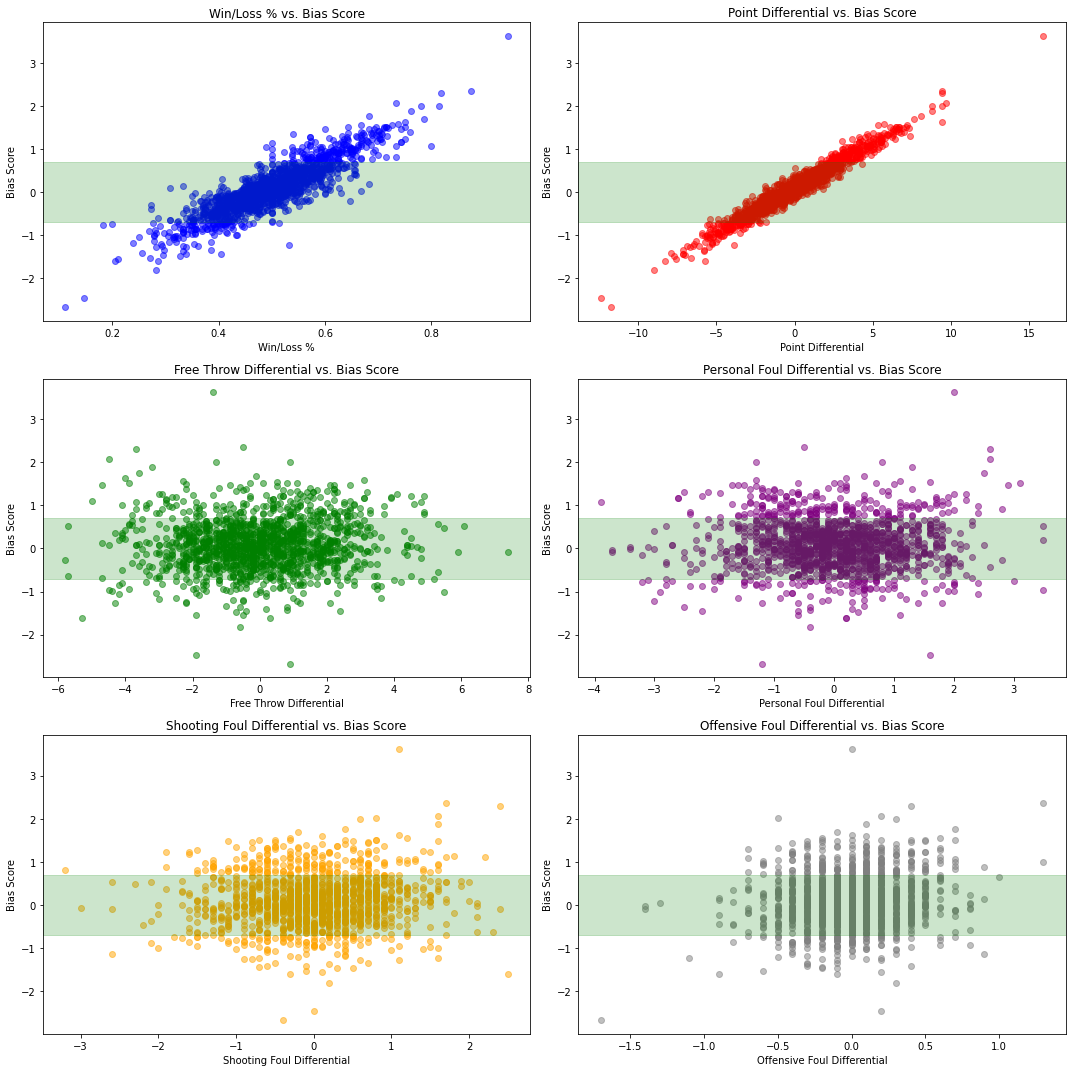

In [9]:
# List of metrics to plot
metrics = ['Win/Loss %', 'Point Differential', 'Free Throw Differential', 'Personal Foul Differential', 
           'Shooting Foul Differential', 'Offensive Foul Differential']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
axs = axs.flatten()

colors = ['blue', 'red', 'green', 'purple', 'orange', 'gray']

for i, metric in enumerate(metrics):
    axs[i].scatter(combined_df[metric], combined_df['Bias Score'], alpha=0.5, color=colors[i])
    axs[i].axhspan(golden_zone_low, golden_zone_high, color='green', alpha=0.2)
    axs[i].set_xlabel(metric)
    axs[i].set_ylabel('Bias Score')
    axs[i].set_title('{} vs. Bias Score'.format(metric))

    
plt.tight_layout()
plt.show()


In [10]:
combined_df.columns

Index(['Referee Name', 'Team', 'Total Games Officiated', 'Wins', 'Losses',
       'Win/Loss %', 'Team Points Per Game', 'Free Throws Attempted',
       'Personal Fouls', 'Shooting Fouls', 'Offensive Fouls',
       'Opponent Points Per Game', 'Opponent Free Throws Attempted',
       'Opponent Personal Fouls', 'Opponent Shooting Fouls',
       'Opponent Offensive Fouls', 'Point Differential',
       'Free Throw Differential', 'Personal Foul Differential',
       'Shooting Foul Differential', 'Offensive Foul Differential',
       'Bias Score', 'Bias'],
      dtype='object')

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [12]:
combined_df

,Referee Name,Team,Total Games Officiated,Wins,Losses,Win/Loss %,Team Points Per Game,Free Throws Attempted,Personal Fouls,Shooting Fouls,...,Opponent Personal Fouls,Opponent Shooting Fouls,Opponent Offensive Fouls,Point Differential,Free Throw Differential,Personal Foul Differential,Shooting Foul Differential,Offensive Foul Differential,Bias Score,Bias
0,Aaron Smith,Milwaukee Bucks,30,18,12,0.600,110.5,22.5,17.5,6.9,...,19.9,10.1,1.4,3.7,4.9,-2.4,-3.2,0.3,0.8000,Bias
1,Aaron Smith,Boston Celtics,32,25,7,0.781,112.6,21,19.3,9.4,...,18.5,8.6,1.7,9.4,-1.3,0.8,0.8,-0.5,2.0062,Bias
2,Aaron Smith,Cleveland Cavaliers,20,14,6,0.700,111.9,20.2,18,9.5,...,17.8,8.8,1.5,6.5,-0.6,0.2,0.7,-0.4,1.4250,Bias
3,Aaron Smith,Detroit Pistons,34,14,20,0.412,101.4,21,17.6,8.5,...,18,9,1.3,-5.2,2.0,-0.4,-0.5,0.2,-0.7626,Bias
4,Aaron Smith,Charlotte Hornets,23,12,11,0.522,108.4,24.1,17.1,8,...,19.6,10.6,1.3,-1.8,5.9,-2.5,-2.6,0.3,-0.0906,No Bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Zach Zarba,Utah Jazz,81,46,35,0.568,101.5,23.9,21.6,9.7,...,21.3,9.7,2.1,1.6,-0.5,0.3,0.0,-0.3,0.3586,No Bias
1406,Zach Zarba,Cleveland Cavaliers,80,41,39,0.513,101.5,24.3,20.1,9.3,...,20.6,10.1,1.6,-1.8,1.6,-0.5,-0.8,0.1,-0.1974,No Bias
1407,Zach Zarba,Los Angeles Lakers,88,51,37,0.580,103.2,24.1,19.4,8.7,...,20.9,10.4,1.6,0.9,3.1,-1.5,-1.7,0.1,0.2960,No Bias
1408,Zach Zarba,Memphis Grizzlies,71,36,35,0.507,99.8,25,21.7,9.8,...,22,10.2,2,-1.2,0.7,-0.3,-0.4,0.0,-0.1386,No Bias


# Model 1

In [13]:
# Load the dataset
df = combined_df.copy()

# Encode categorical variables
encoder = LabelEncoder()
df['Referee Name'] = encoder.fit_transform(df['Referee Name'])
df['Team'] = encoder.fit_transform(df['Team'])
df['Bias'] = (df['Bias'] == 'No Bias').astype(int)
df['Bias'] = 1 - df['Bias']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bias', axis=1), df['Bias'], test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train.values.astype('float32')).to(device)
X_test = torch.from_numpy(X_test.values.astype('float32')).to(device)
y_train = torch.from_numpy(y_train.values.astype('float32')).to(device)
y_test = torch.from_numpy(y_test.values.astype('float32')).to(device)

# Define the neural network architecture
class RefereeBiasModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

# Initialize the model
input_size = X_train.shape[1]  # Number of input features (excluding bias)
model = RefereeBiasModel(input_size).to(device)

# Define the loss function and optimizer with L2 regularization
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0015, weight_decay=0.001)


# Create the training data loader
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
batch_size = 24
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Train the model with L2 regularization
num_epochs = 500
train_losses = []
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs.squeeze(), y)

        # Add L2 regularization
        l2_lambda = 0.001
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = loss + l2_lambda * l2_norm

        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(epoch_loss)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

Epoch [1/500], Loss: 50.8224
Epoch [2/500], Loss: 33.4337
Epoch [3/500], Loss: 31.6419
Epoch [4/500], Loss: 30.6357
Epoch [5/500], Loss: 30.2796
Epoch [6/500], Loss: 29.7934
Epoch [7/500], Loss: 28.1652
Epoch [8/500], Loss: 27.2015
Epoch [9/500], Loss: 25.5326
Epoch [10/500], Loss: 23.9226
Epoch [11/500], Loss: 22.4891
Epoch [12/500], Loss: 20.1062
Epoch [13/500], Loss: 18.1976
Epoch [14/500], Loss: 19.2562
Epoch [15/500], Loss: 16.4091
Epoch [16/500], Loss: 16.8952
Epoch [17/500], Loss: 16.5390
Epoch [18/500], Loss: 15.1386
Epoch [19/500], Loss: 16.3107
Epoch [20/500], Loss: 15.1760
Epoch [21/500], Loss: 14.3208
Epoch [22/500], Loss: 13.4074
Epoch [23/500], Loss: 14.3632
Epoch [24/500], Loss: 13.9905
Epoch [25/500], Loss: 14.7114
Epoch [26/500], Loss: 14.5710
Epoch [27/500], Loss: 14.4905
Epoch [28/500], Loss: 14.7032
Epoch [29/500], Loss: 14.9815
Epoch [30/500], Loss: 13.9199
Epoch [31/500], Loss: 14.2045
Epoch [32/500], Loss: 15.1463
Epoch [33/500], Loss: 13.3068
Epoch [34/500], Los

In [14]:
# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()

# Calculate the metrics
tp = torch.sum((y_pred == 1) & (y_test == 1)).float()
fp = torch.sum((y_pred == 1) & (y_test == 0)).float()
tn = torch.sum((y_pred == 0) & (y_test == 0)).float()
fn = torch.sum((y_pred == 0) & (y_test == 1)).float()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))


Accuracy: 0.5591
Precision: 0.3333
Recall: 0.3227
F1 Score: 0.3279


In [15]:
# Switch the model to evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    y_pred = model.forward(X_test).squeeze()

# Calculate the test loss
test_loss = criterion(y_pred, y_test)
print('Test Loss: {:.4f}'.format(test_loss.item()))

Test Loss: 0.1094


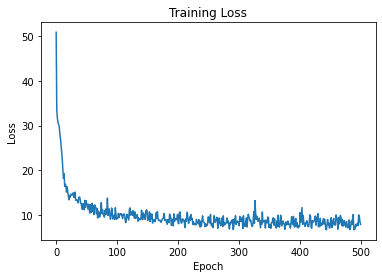

In [16]:
# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


# Model 2

In [17]:
import torch.nn.functional as F

# Load the dataset
df_2 = combined_df.copy()

# Encode categorical variables
encoder = LabelEncoder()
df_2['Referee Name'] = encoder.fit_transform(df_2['Referee Name'])
df_2['Team'] = encoder.fit_transform(df_2['Team'])
df_2['Bias'] = (df_2['Bias'] == 'No Bias').astype(int)
df_2['Bias'] = 1 - df_2['Bias']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_2.drop('Bias', axis=1), df_2['Bias'], test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train.values.astype('float32')).to(device)
X_test = torch.from_numpy(X_test.values.astype('float32')).to(device)
y_train = torch.from_numpy(y_train.values.astype('float32')).to(device)
y_test = torch.from_numpy(y_test.values.astype('float32')).to(device)

# Define the neural network architecture
class RefereeBiasModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        x = torch.sigmoid(x)
        return x

# Initialize the model
input_size = X_train.shape[1]  # Number of input features (excluding bias)
model = RefereeBiasModel(input_size).to(device)

# Define the loss function and optimizer with L2 and L1 regularization
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0015, weight_decay=0.0001)
l1_lambda = 0.0001
l2_lambda = 0.0001

# Create the training data loader
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Train the model with L2 and L1 regularization
num_epochs = 500
train_losses = []
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs.squeeze(), y)

        # Add L2 and L1 regularization
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = loss + l1_lambda * l1_norm + l2_lambda * l2_norm

        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(epoch_loss)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))


Epoch [1/500], Loss: 15.7927
Epoch [2/500], Loss: 14.8149
Epoch [3/500], Loss: 14.2260
Epoch [4/500], Loss: 14.0575
Epoch [5/500], Loss: 13.4651
Epoch [6/500], Loss: 13.3817
Epoch [7/500], Loss: 13.0989
Epoch [8/500], Loss: 12.6855
Epoch [9/500], Loss: 12.3799
Epoch [10/500], Loss: 11.3863
Epoch [11/500], Loss: 10.9525
Epoch [12/500], Loss: 11.0925
Epoch [13/500], Loss: 10.1172
Epoch [14/500], Loss: 10.1126
Epoch [15/500], Loss: 8.6858
Epoch [16/500], Loss: 8.0911
Epoch [17/500], Loss: 8.3684
Epoch [18/500], Loss: 7.7089
Epoch [19/500], Loss: 7.4232
Epoch [20/500], Loss: 7.5222
Epoch [21/500], Loss: 6.5875
Epoch [22/500], Loss: 6.4020
Epoch [23/500], Loss: 6.3905
Epoch [24/500], Loss: 6.0517
Epoch [25/500], Loss: 6.8195
Epoch [26/500], Loss: 6.3109
Epoch [27/500], Loss: 5.8308
Epoch [28/500], Loss: 6.3056
Epoch [29/500], Loss: 6.2602
Epoch [30/500], Loss: 5.6555
Epoch [31/500], Loss: 5.3009
Epoch [32/500], Loss: 5.3406
Epoch [33/500], Loss: 5.3001
Epoch [34/500], Loss: 5.4897
Epoch [35

In [18]:
# Switch the model to evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    y_pred = model.forward(X_test).squeeze()

# Calculate the test loss
test_loss = criterion(y_pred, y_test)
print('Test Loss: {:.4f}'.format(test_loss.item()))

Test Loss: 0.0985


In [19]:
# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()

# Calculate the metrics
tp = torch.sum((y_pred == 1) & (y_test == 1)).float()
fp = torch.sum((y_pred == 1) & (y_test == 0)).float()
tn = torch.sum((y_pred == 0) & (y_test == 0)).float()
fn = torch.sum((y_pred == 0) & (y_test == 1)).float()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))

Accuracy: 0.5532
Precision: 0.3333
Recall: 0.3404
F1 Score: 0.3368


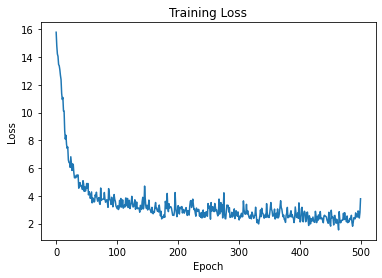

In [20]:
# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [21]:
import torch.nn.functional as F

# Load the dataset
df_3 = combined_df.copy()

# Encode categorical variables
encoder = LabelEncoder()
df_3['Referee Name'] = encoder.fit_transform(df_3['Referee Name'])
df_3['Team'] = encoder.fit_transform(df_3['Team'])
df_3['Bias'] = (df_3['Bias'] == 'No Bias').astype(int)
df_3['Bias'] = 1 - df_3['Bias']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_3.drop('Bias', axis=1), df_3['Bias'], test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.from_numpy(X_train.values.astype('float32')).to(device)
X_test = torch.from_numpy(X_test.values.astype('float32')).to(device)
y_train = torch.from_numpy(y_train.values.astype('float32')).to(device)
y_test = torch.from_numpy(y_test.values.astype('float32')).to(device)

# Define the neural network architecture
class RefereeBiasModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input_size = input_size
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

# Initialize the model
input_size = X_train.shape[1]  # Number of input features (excluding bias)
model = RefereeBiasModel(input_size).to(device)

# Define the loss function and optimizer with L2 regularization
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


# Create the training data loader
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Train the model with L2 regularization
num_epochs = 500
train_losses = []
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs.squeeze(), y)

        # Add L2 regularization
        l2_lambda = 0.001
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = loss + l2_lambda * l2_norm

        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(epoch_loss)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

Epoch [1/500], Loss: 46.7470
Epoch [2/500], Loss: 36.9445
Epoch [3/500], Loss: 33.7054
Epoch [4/500], Loss: 31.8188
Epoch [5/500], Loss: 30.7958
Epoch [6/500], Loss: 30.7541
Epoch [7/500], Loss: 30.3927
Epoch [8/500], Loss: 29.0209
Epoch [9/500], Loss: 28.4124
Epoch [10/500], Loss: 28.5830
Epoch [11/500], Loss: 28.9661
Epoch [12/500], Loss: 28.5037
Epoch [13/500], Loss: 28.3079
Epoch [14/500], Loss: 28.2786
Epoch [15/500], Loss: 27.8138
Epoch [16/500], Loss: 27.3923
Epoch [17/500], Loss: 27.5245
Epoch [18/500], Loss: 27.9681
Epoch [19/500], Loss: 27.2828
Epoch [20/500], Loss: 27.0866
Epoch [21/500], Loss: 26.9549
Epoch [22/500], Loss: 27.1411
Epoch [23/500], Loss: 27.1390
Epoch [24/500], Loss: 26.9660
Epoch [25/500], Loss: 26.9150
Epoch [26/500], Loss: 26.7615
Epoch [27/500], Loss: 26.4601
Epoch [28/500], Loss: 26.5930
Epoch [29/500], Loss: 25.8179
Epoch [30/500], Loss: 26.6734
Epoch [31/500], Loss: 26.6876
Epoch [32/500], Loss: 26.0622
Epoch [33/500], Loss: 26.1920
Epoch [34/500], Los

In [22]:
# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred >= 0.5).float()

# Calculate the metrics
tp = torch.sum((y_pred == 1) & (y_test == 1)).float()
fp = torch.sum((y_pred == 1) & (y_test == 0)).float()
tn = torch.sum((y_pred == 0) & (y_test == 0)).float()
fn = torch.sum((y_pred == 0) & (y_test == 1)).float()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 Score: {:.4f}'.format(f1))

Accuracy: 0.5603
Precision: 0.3333
Recall: 0.3191
F1 Score: 0.3261


In [23]:
# Switch the model to evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    y_pred = model.forward(X_test).squeeze()

# Calculate the test loss
test_loss = criterion(y_pred, y_test)
print('Test Loss: {:.4f}'.format(test_loss.item()))

Test Loss: 0.1466


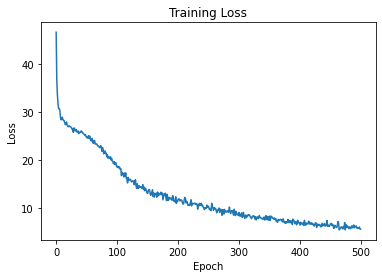

In [24]:
# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Model 4 (CNN)

Epoch 1, Loss: 0.546195
Epoch 2, Loss: 0.534968
Epoch 3, Loss: 0.486727
Epoch 4, Loss: 0.444882
Epoch 5, Loss: 0.343630
Epoch 6, Loss: 0.240826
Epoch 7, Loss: 0.163580
Epoch 8, Loss: 0.182681
Epoch 9, Loss: 0.166060
Epoch 10, Loss: 0.122185
Epoch 11, Loss: 0.079149
Epoch 12, Loss: 0.061328
Epoch 13, Loss: 0.046276
Epoch 14, Loss: 0.038924
Epoch 15, Loss: 0.031991
Epoch 16, Loss: 0.027818
Epoch 17, Loss: 0.023683
Epoch 18, Loss: 0.020093
Epoch 19, Loss: 0.018773
Epoch 20, Loss: 0.018553


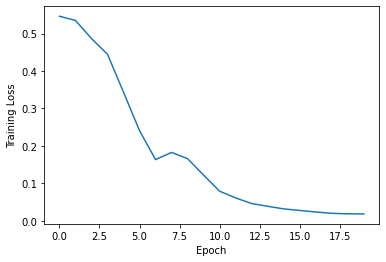

Test Loss: 0.1922096014, Test Accuracy: 0.9184397163120568


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df_4 = combined_df.copy()

# Label encode categorical variables if needed
encoder = LabelEncoder()
df_4['Referee Name'] = encoder.fit_transform(df_4['Referee Name'])
df_4['Team'] = encoder.fit_transform(df_4['Team'])
df_4['Bias'] = (df_4['Bias'] == 'No Bias').astype(int)
df_4['Bias'] = 1 - df_4['Bias']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_4.drop('Bias', axis=1), df_4['Bias'], test_size=0.2, random_state=42)

# Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(X_train.values.astype('float32')).to(device)
X_test_tensor = torch.tensor(X_test.values.astype('float32')).to(device)
y_train_tensor = torch.tensor(y_train.values.astype('float32')).to(device)
y_test_tensor = torch.tensor(y_test.values.astype('float32')).to(device)

class RefereeCNN(nn.Module):
    def __init__(self):
        super(RefereeCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=22, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(32, 32, kernel_size=1, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv1d(32, 32, kernel_size=1, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32, 32)
        self.fc2 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = x.unsqueeze(1)  # Add an extra channel dimension
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

import matplotlib.pyplot as plt

# Define the training function
def train(model, optimizer, loss_fn, X_train, y_train, batch_size=32, num_epochs=20):
    train_losses = []
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            # Get the current batch
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]

            # Forward pass
            y_pred = model(batch_X)

            # Compute the loss
            loss = loss_fn(y_pred.squeeze(), batch_y)

            # Backward pass and optimization step
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Save the loss for plotting
        train_losses.append(loss.item())

        # Print the loss every 10 epochs
        if (epoch + 1) % 1 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

    # Plot the training losses
    plt.plot(train_losses)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.show()

# Initialize the model, loss function, and optimizer
model = RefereeCNN().to(device)
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model and plot the losses
train(model.to(device), optimizer, loss_fn, X_train_tensor, y_train_tensor)

# Evaluate the model on the test set
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = loss_fn(y_pred_test.squeeze(), y_test_tensor)
    test_acc = ((y_pred_test.squeeze() > 0.5) == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f"Test Loss: {test_loss.item():.10f}, Test Accuracy: {test_acc}")

In [26]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = loss_fn(y_pred_test.squeeze(), y_test_tensor)
    y_pred_test = (y_pred_test.squeeze() > 0.5).int().cpu().numpy()
    y_test = y_test_tensor.cpu().numpy()
    print(f"Test Loss: {test_loss.item():.6f}")
    print(classification_report(y_test, y_pred_test))


Test Loss: 0.192210
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       188
         1.0       0.87      0.88      0.88        94

    accuracy                           0.92       282
   macro avg       0.91      0.91      0.91       282
weighted avg       0.92      0.92      0.92       282



For binary prediction tasks specifically, CNNs can be used to extract features from the input data that are relevant for predicting the output. The features learned by the CNN can then be fed into a fully connected layer that performs the final prediction.

In [27]:
print(combined_df['Bias'].value_counts())

No Bias    901
Bias       509
Name: Bias, dtype: int64
